# Proyek Analisis Data: Air Quality
- **Nama:** Sheina Azima
- **Email:** sheizana09@gmail.com
- **ID Dicoding:** M248B4KX413

## Menentukan Pertanyaan Bisnis

- Is the number of casual users lower or higher than registered users at any given time?
- Is there a difference in the number of bicycles used between workingdays and holidays?

## Import Semua Packages/Library yang Digunakan

In [59]:
pip install streamlit

In [60]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import streamlit as st
import matplotlib.pyplot as plt  
import seaborn as sns        
pio.templates.default = "plotly_white"

st.title('Analisis Penggunaan Sepeda')

2024-10-04 23:21:10.991 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 23:21:10.991 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

## Data Wrangling

### Gathering Data

In [61]:
data_day = pd.read_csv("day.csv")
data_hour = pd.read_csv("hour.csv")

data = pd.concat([data_day, data_hour], ignore_index=True)

print(data.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  hr  
0   985 NaN  
1   801 NaN  
2  1349 NaN  
3  1562 NaN  
4  1600 NaN  


**Insight:**
- xxx
- xxx

### Assessing Data

In [62]:
print("Dimensi Data (Rows, Columns):", data.shape)

print("\nInformasi Data:")
print(data.info())

print("\nLima Baris Pertama dari Data:")
print(data.head())

print("\nStatistik Deskriptif:")
print(data.describe())

print("\nJumlah Missing Values per Kolom:")
print(data.isnull().sum())

print("\nJumlah Nilai Unik per Kolom:")
print(data.nunique())

Dimensi Data (Rows, Columns): (18110, 17)

Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     18110 non-null  int64  
 1   dteday      18110 non-null  object 
 2   season      18110 non-null  int64  
 3   yr          18110 non-null  int64  
 4   mnth        18110 non-null  int64  
 5   holiday     18110 non-null  int64  
 6   weekday     18110 non-null  int64  
 7   workingday  18110 non-null  int64  
 8   weathersit  18110 non-null  int64  
 9   temp        18110 non-null  float64
 10  atemp       18110 non-null  float64
 11  hum         18110 non-null  float64
 12  windspeed   18110 non-null  float64
 13  casual      18110 non-null  int64  
 14  registered  18110 non-null  int64  
 15  cnt         18110 non-null  int64  
 16  hr          17379 non-null  float64
dtypes: float64(5), int64(11), object(1)
memory usage

**Insight:**
- xxx
- xxx

### Cleaning Data

In [63]:
if 'Unnamed' in data.columns:
    data = data.drop(columns=['Unnamed'])

data_cleaned = data.dropna()

data_cleaned = data_cleaned.drop_duplicates()

if 'PM2.5' in data_cleaned.columns:
    data_cleaned = data_cleaned[data_cleaned['PM2.5'] <= 500]

data_cleaned = data_cleaned.dropna(axis=1, how='all')

print(data_cleaned.head())

     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
731        1  2011-01-01       1   0     1        0        6           0   
732        2  2011-01-01       1   0     1        0        6           0   
733        3  2011-01-01       1   0     1        0        6           0   
734        4  2011-01-01       1   0     1        0        6           0   
735        5  2011-01-01       1   0     1        0        6           0   

     weathersit  temp   atemp   hum  windspeed  casual  registered  cnt   hr  
731           1  0.24  0.2879  0.81        0.0       3          13   16  0.0  
732           1  0.22  0.2727  0.80        0.0       8          32   40  1.0  
733           1  0.22  0.2727  0.80        0.0       5          27   32  2.0  
734           1  0.24  0.2879  0.75        0.0       3          10   13  3.0  
735           1  0.24  0.2879  0.75        0.0       0           1    1  4.0  


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...


Korelasi Antar Variabel Numerik:
             instant    season        yr      mnth   holiday   weekday  \
instant     1.000000  0.376402  0.806448  0.455668  0.013725  0.001460   
season      0.376402  1.000000 -0.010382  0.830429 -0.009623 -0.002365   
yr          0.806448 -0.010382  1.000000 -0.010121  0.006743 -0.004524   
mnth        0.455668  0.830429 -0.010121  1.000000  0.018461  0.010365   
holiday     0.013725 -0.009623  0.006743  0.018461  1.000000 -0.102083   
weekday     0.001460 -0.002365 -0.004524  0.010365 -0.102083  1.000000   
workingday -0.003352  0.013692 -0.002189 -0.003576 -0.252494  0.035948   
weathersit -0.010367 -0.013339 -0.020163  0.006728 -0.017635  0.004274   
temp        0.127555  0.312868  0.041170  0.202395 -0.027386 -0.001731   
atemp       0.128904  0.320265  0.039485  0.208829 -0.031030 -0.008770   
hum         0.008786  0.152067 -0.084248  0.165924 -0.010735 -0.037561   
windspeed  -0.070409 -0.151422 -0.008796 -0.136889  0.004037  0.011542   
casu

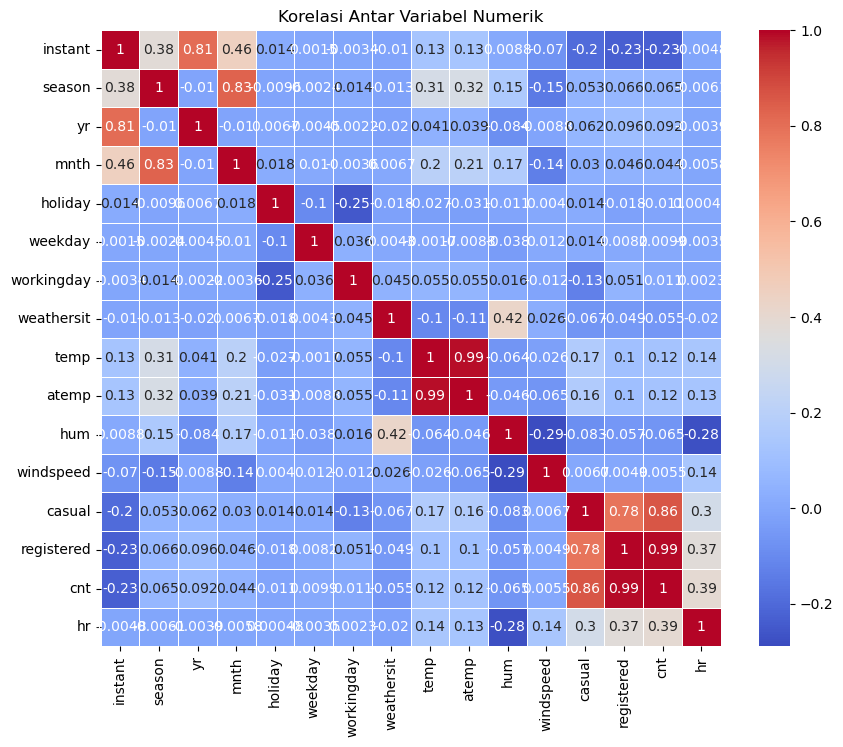

In [64]:
print("\nKorelasi Antar Variabel Numerik:")
corr_matrix = data.corr()
print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [65]:
st.write("Data Awal:")
st.write(data.head())

st.subheader("Jumlah Pengguna Kasual vs Terdaftar")
st.write("Total Pengguna Kasual:", data['casual'].sum())
st.write("Total Pengguna Terdaftar:", data['registered'].sum())

2024-10-04 23:21:17.380 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 23:21:17.380 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 23:21:17.380 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 23:21:17.380 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 23:21:17.516 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 23:21:17.516 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 23:21:17.524 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 23:21:17.531 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

### Pertanyaan 2:

In [66]:
st.subheader("Perbandingan Penggunaan Sepeda antara Hari Kerja dan Hari Libur")

total_users_by_working_day = data.groupby('workingday')['cnt'].sum().reset_index()

st.write("Total Pengguna Berdasarkan Hari Kerja dan Hari Libur:")
st.write(total_users_by_working_day)

fig3 = px.bar(total_users_by_working_day, 
                x='workingday', 
                y='cnt', 
                title='Penggunaan Sepeda berdasarkan Hari Kerja (1 = Ya, 0 = Tidak)',
                labels={'workingday': 'Hari Kerja', 'cnt': 'Total Pengguna'})
    
st.plotly_chart(fig3)

2024-10-04 23:21:17.677 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 23:21:17.679 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 23:21:17.691 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 23:21:17.694 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 23:21:17.694 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 23:21:17.699 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 23:21:17.699 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 23:21:17.710 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

In [67]:
st.subheader("Binning pada Jumlah Sepeda yang Digunakan")
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', 
          '251-300', '301-350', '351-400', '401-450', '451-500']

data['binned_cnt'] = pd.cut(data['cnt'], bins=bins, labels=labels, right=False)

binned_counts = data['binned_cnt'].value_counts().sort_index()

st.write("Frekuensi Penggunaan Sepeda Berdasarkan Bin:")
st.bar_chart(binned_counts)

binned_counts_df = binned_counts.reset_index()
binned_counts_df.columns = ['Bin Jumlah Pengguna', 'Frekuensi']

fig2 = px.bar(binned_counts_df, 
               x='Bin Jumlah Pengguna', 
               y='Frekuensi', 
               title='Frekuensi Penggunaan Sepeda Berdasarkan Bin',
               labels={'Bin Jumlah Pengguna': 'Bin Jumlah Pengguna', 'Frekuensi': 'Frekuensi'})

st.plotly_chart(fig2)

2024-10-04 23:21:17.914 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 23:21:17.914 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 23:21:17.958 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 23:21:17.961 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 23:21:17.961 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 23:21:17.961 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 23:21:18.112 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 23:21:18.112 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2